In [120]:
import pandas as pd # Importing the pandas library for data manipulation and analysis
import numpy as np # Importing the numpy library for linear algebra operations
import matplotlib.pyplot as plt # Importing matplotlib.pyplot for data visualization
import seaborn as sns # Importing seaborn for enhanced data visualization, especially for heatmaps

from sklearn.model_selection import train_test_split # Importing train_test_split to split the dataset into training and testing sets
from sklearn import metrics # Importing metrics for performance evaluation of the model
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to visualize the performance of the classification model

In [121]:
# load dataset
df_training = pd.read_csv('training_normalized.csv')
df_testing = pd.read_csv('testing_normalized.csv')

In [122]:
# show dataset
df_training.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,0,39,14,5,18,2,0,932,17,1
1,3,65,0,49,1,10,8,0,1,557,6,1
2,4,55,0,14,4,6,18,0,2,185,3,1
3,5,58,1,38,21,7,7,2,1,396,29,1
4,6,23,1,32,20,5,8,0,1,617,20,1


In [123]:
df_testing.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [124]:
X_columns = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']

xTrain = df_training[X_columns] # take columns we want for training
yTrain = df_training['Churn'] # take the value we want to predict

In [125]:
xTest = df_testing[X_columns]
yTest = df_testing['Churn']

In [126]:
# Print the shape of the training feature set
print("xTrain shape:", xTrain.shape)

# Print the shape of the test feature set
print("xTest shape:", xTest.shape)

# Print the shape of the training target set
print("yTrain shape:", yTrain.shape)

# Print the shape of the test target set
print("yTest shape:", yTest.shape)

xTrain shape: (440832, 9)
xTest shape: (64374, 9)
yTrain shape: (440832,)
yTest shape: (64374,)


In [127]:
# Import performance metrics

from sklearn.metrics import accuracy_score, classification_report

In [128]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()

dummy.fit(xTrain, yTrain) # train a dummy classifier to compare to the actual model
dummy.predict(xTest)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [129]:
# Evaluate model performance

accuracy = dummy.score(xTest, yTest)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.47


In [130]:
# Import the RandomForestClassifier from the sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the gini index and 100 decision trees. Train
# the model, in such a way that allows the trees to grow until all leaves are pure or contain fewer samples than the minimum allowed

rf_class = RandomForestClassifier(criterion='gini',max_depth=None, n_estimators=100, min_samples_split=2, random_state=42)

In [131]:
# Train (fit) the Random Forest model on the training data

rf_class.fit(xTrain, yTrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [132]:
# Use the trained Random Forest model to predict the species on the test data

yHat = rf_class.predict(xTest)

In [133]:
# Evaluate model performance

accuracy = accuracy_score(yTest, yHat)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(yTest, yHat))


Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.08      0.16     33881
           1       0.50      1.00      0.66     30493

    accuracy                           0.52     64374
   macro avg       0.74      0.54      0.41     64374
weighted avg       0.75      0.52      0.40     64374



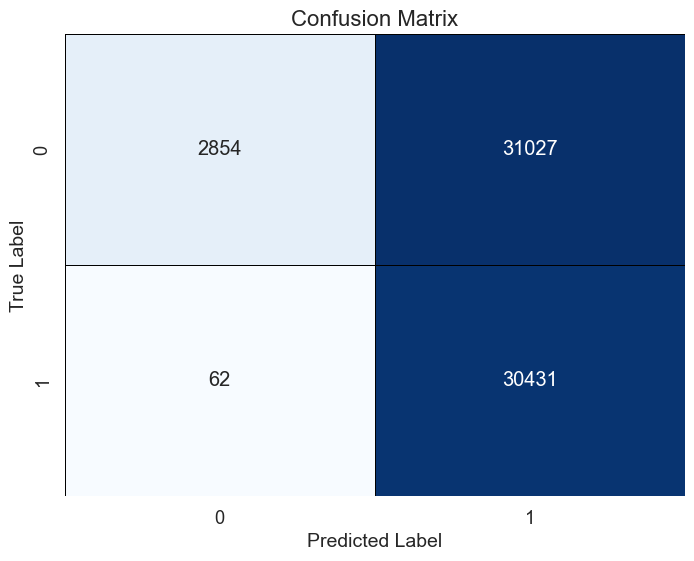

In [134]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix by evaluating yTest and yHat
cm = confusion_matrix(yTest, yHat)


# Set up the figure size and font scale for better readability
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

# Create a sns.heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5, linecolor='black')

# Add labels and title to the heatmap
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)



# Show the plot
plt.show()